In [90]:
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeLine
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [91]:
# Đường dẫn file JSON
path = 'D:\\Self Study\\Python\\Data Science\\Machine Learning\\Supervised machine learning\\OpenSAT\\data.json'

In [92]:
# Load dữ liệu
with open(path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [93]:
for item in data:
    print(item)

math
english
practice_test


In [94]:
math_rows = []
english_rows = []
practice_test_rows = []

In [95]:
for item in data["math"]:
    q = item["question"]
    math_rows.append({
        "id": item["id"],
        "question": q.get("question"),
        "choice_A": q["choices"].get("A"),
        "choice_B": q["choices"].get("B"),
        "choice_C": q["choices"].get("C"),
        "choice_D": q["choices"].get("D"),
        "correct_answer": q.get("correct_answer"),
        "explanation": q.get("explanation"),
        "domain": item.get("domain"),
        "difficulty": item.get("difficulty")
    })

In [96]:
for item in data["english"]:
    q = item["question"]
    english_rows.append({
        "id": item["id"],
        "question": q.get("question"),
        "choice_A": q["choices"].get("A"),
        "choice_B": q["choices"].get("B"),
        "choice_C": q["choices"].get("C"),
        "choice_D": q["choices"].get("D"),
        "correct_answer": q.get("correct_answer"),
        "explanation": q.get("explanation"),
        "domain": item.get("domain"),
        "difficulty": item.get("difficulty")
    })

In [97]:
for item in data["practice_test"]:
    practice_test_rows.append({
        "name": item["name"],
        "module_1": item["module_1"],
        "module_2": item["module_2"],
        "module_3": item["module_3"],
        "module_4": item["module_4"]
    })

In [98]:
# Chuyển thành DataFrame và lưu
math_df = pd.DataFrame(math_rows)
math_df.to_csv("sat_math_dataset.csv", index=False)

In [99]:
english_df = pd.DataFrame(english_rows)
english_df.to_csv("sat_english_dataset.csv", index=False)

In [100]:
practice_test_df = pd.DataFrame(practice_test_rows)
practice_test_df.to_csv("sat_practice_test_dataset.csv", index=False)

In [101]:
math_df


,id,question,choice_A,choice_B,choice_C,choice_D,correct_answer,explanation,domain,difficulty
0,281a4f3b,"A certain college had 3,000 students enrolled ...","f(x) = 3,000(0.02)^x","f(x) = 0.98(3,000)^x","f(x) = 3,000(0.002)^x","f(x) = 3,000(0.98)^x",D,Because the change in the number of students d...,Advanced Math,Medium
1,b81173a5,The graph of the function \(f(x)= x^2 + 2x + 3...,-2,0,2,4,A,The sum of the roots of a quadratic equation i...,Advanced Math,Hard
2,random_id_a8,The function $f(x)$ is defined by $f(x) = \fra...,1 only,-1 only,0 only,1 and -1,A,A function is undefined when the denominator e...,Advanced Math,Hard
3,9f6f8f8f,A survey of 100 people found that 60 people li...,10,20,40,60,C,We can use a Venn diagram to solve this proble...,Problem-Solving and Data Analysis,Medium
4,random_id_c4,A rectangle has a length of 12 cm and a width ...,17,34,60,144,C,The area of a rectangle is found by multiplyin...,Geometry and Trigonometry,Medium
...,...,...,...,...,...,...,...,...,...,...
1026,789054fe,"In the $xy$-plane, a circle with center $(3,2)...",4,5,8,13,B,The radius of the circle is the distance betwe...,Geometry and Trigonometry,Medium
1027,random_id_d7,A group of friends is planning a trip. They de...,4,5,6,7,B,Let \$d$ represent the number of days the car ...,Problem-Solving and Data Analysis,Medium
1028,random_id_8,A survey of 100 people found that 60 people li...,10,20,30,40,B,We can use a Venn Diagram to visualize the pro...,Problem-Solving and Data Analysis,Medium
1029,4bc98d5f,A circle has a radius of 5. What is the area ...,5\pi,10\pi,25\pi,100\pi,C,The area of a circle is given by the formula $...,Geometry and Trigonometry,Medium


In [102]:
english_df

,id,question,choice_A,choice_B,choice_C,choice_D,correct_answer,explanation,domain,difficulty
0,random_id_a1,What is Mill's main point in this passage from...,Suppressing opinions robs future generations o...,It is harmful to silence opinions that are hel...,People who dissent from an opinion are more li...,"It is important to respect all opinions, even ...",A,Mill argues that suppressing opinions is a har...,Information and Ideas,Medium
1,random_id_d6,Which choice best combines the sentences at th...,This finding was a direct challenge to the acc...,This finding directly challenged the accepted ...,This finding directly challenged the accepted ...,"This finding, a direct challenge to the accept...",C,Choice C is the best option because it combine...,Standard English Conventions,Medium
2,9955574d,What is the main idea of this article?,Instrumental use of technology is more importa...,The distinction between instrumental and nonin...,Noninstrumental use of technology is more impo...,The use of technology has a significant impact...,B,The article focuses on how the distinction bet...,Expression of Ideas,Medium
3,99315200,Which statement best describes the author’s ma...,The internet has revolutionized the way inform...,The internet has both positive and negative ef...,Traditional sources of information are no long...,The internet has made the world a smaller plac...,A,The author is most interested in the ways that...,Information and Ideas,Hard
4,random_id_e1,Which of the following sentences correctly use...,"The play, which was written by Shakespeare, is...","The play which was written by Shakespeare, is ...",The play which was written by Shakespeare is a...,"The play which was written by Shakespeare, is ...",A,A nonessential phrase can be removed from a se...,Standard English Conventions,Easy
...,...,...,...,...,...,...,...,...,...,...
1438,a452c78f,The conflicting views about the organization o...,the lack of available technology to study genes.,the lack of a consensus about the nature of ge...,the lack of knowledge about the structure of c...,the lack of understanding about the process of...,C,The passage states that the field of genetics ...,Information and Ideas,Hard
1439,892f182a,"The phrase ""from economic hardship to mental i...",emphasize the many causes of homelessness.,explain the history of homelessness.,describe the different types of homeless shelt...,suggest that homelessness is a recent problem.,A,"The phrase ""from economic hardship to mental i...",Information and Ideas,Easy
1440,d79f1d90,The author uses descriptive details in this pa...,create a sense of mystery and suspense.,provide information about the history of the c...,compare the castle to other castles.,explain the importance of the castle to the st...,A,The descriptive details are used to create a s...,Craft and Structure,Medium
1441,random_id_a6,The author’s primary purpose in the passage is to,describe the author’s changing perspective on ...,present a detailed account of the author’s res...,argue that the author’s earlier understanding ...,convince the reader to adopt the author’s curr...,A,The passage primarily focuses on the author’s ...,Information and Ideas,Medium


In [103]:
english_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1443 non-null   object
 1   question        1443 non-null   object
 2   choice_A        1443 non-null   object
 3   choice_B        1443 non-null   object
 4   choice_C        1443 non-null   object
 5   choice_D        1443 non-null   object
 6   correct_answer  1443 non-null   object
 7   explanation     1443 non-null   object
 8   domain          1443 non-null   object
 9   difficulty      1443 non-null   object
dtypes: object(10)
memory usage: 112.9+ KB


In [104]:
practice_test_df

,name,module_1,module_2,module_3,module_4
0,Practce Test #1,"[1241, 900, 1028, 1066, 705, 452, 1062, 844, 1...","[1044, 642, 46, 99, 394, 888, 1229, 1183, 174,...","[713, 463, 354, 372, 659, 116, 907, 69, 118, 2...","[744, 693, 210, 69, 831, 930, 233, 744, 798, 9..."
1,Practce Test #2,"[95, 661, 847, 14, 430, 836, 596, 680, 742, 19...","[418, 211, 746, 30, 1241, 1032, 600, 664, 102,...","[798, 929, 513, 406, 616, 67, 749, 113, 547, 1...","[647, 57, 130, 156, 708, 139, 798, 806, 632, 3..."
2,Practce Test #3,"[1190, 799, 394, 1113, 1217, 997, 46, 297, 347...","[1187, 835, 72, 936, 479, 741, 819, 563, 106, ...","[406, 118, 113, 396, 366, 484, 126, 461, 829, ...","[5, 116, 401, 336, 749, 401, 210, 794, 316, 13..."
3,Practce Test #4,"[195, 932, 179, 1078, 944, 638, 1253, 830, 277...","[537, 191, 669, 394, 310, 1059, 997, 354, 804,...","[210, 403, 632, 831, 616, 926, 437, 701, 484, ...","[177, 357, 180, 317, 233, 118, 949, 264, 4, 37..."
4,Practce Test #5,"[835, 14, 4, 773, 584, 1198, 227, 1264, 1272, ...","[1302, 608, 743, 1062, 863, 54, 310, 766, 1126...","[61, 513, 210, 276, 437, 749, 926, 24, 411, 47...","[829, 674, 716, 563, 24, 357, 213, 116, 213, 4..."
...,...,...,...,...,...
114,Practce Test #1,"[1044, 278, 458, 679, 1420, 1222, 338, 1338, 2...","[682, 380, 1082, 705, 80, 1216, 679, 651, 203,...","[890, 414, 209, 935, 244, 137, 67, 453, 255, 8...","[992, 696, 348, 76, 969, 777, 807, 971, 697, 4..."
115,Practce Test #2,"[1392, 1268, 687, 985, 1237, 526, 94, 726, 119...","[623, 560, 144, 558, 329, 232, 1248, 813, 1305...","[141, 192, 851, 345, 248, 792, 950, 662, 330, ...","[199, 439, 350, 284, 78, 726, 697, 634, 16, 74..."
116,Practce Test #3,"[1368, 687, 869, 105, 882, 555, 745, 341, 982,...","[673, 7, 351, 271, 734, 408, 498, 457, 132, 11...","[269, 844, 493, 634, 325, 136, 134, 110, 676, ...","[607, 1017, 913, 380, 799, 489, 830, 493, 542,..."
117,Practce Test #4,"[1330, 534, 4, 291, 915, 1121, 223, 972, 413, ...","[502, 325, 1073, 476, 637, 673, 74, 562, 420, ...","[676, 1017, 221, 493, 275, 950, 222, 630, 242,...","[969, 781, 269, 759, 938, 666, 247, 21, 765, 5..."


### Pre-processing

In [105]:
math_df.dropna(subset=['id', 'question', 'explanation', 'difficulty'], inplace=True)

# Gộp question + choices để tạo context đầu vào
def combine_text(row):
    choices = f"A. {row['choice_A']} B. {row['choice_B']} C. {row['choice_C']} D. {row['choice_D']}"
    return f"{row['question']} {choices}"

math_df["input_text"] = math_df.apply(combine_text, axis=1)

In [106]:
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(math_df["input_text"])
y = math_df["difficulty"]

In [107]:
le = LabelEncoder()
y = le.fit_transform(y)

### Build Model

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [109]:
pipeline = ImPipeLine(steps = [
    ('smote', SMOTE()),
    ('classifier',XGBClassifier(random_state=42))
    ])

### Train Model

In [110]:
pipeline.fit(X_train, y_train)
math_y_pred = pipeline.predict(X_test)

In [111]:
cm = confusion_matrix(y_test, math_y_pred)
print('Accuracy:', accuracy_score(y_test, math_y_pred))
print('Classification Report', classification_report(y_test, math_y_pred))
print('Confusion Matrix', cm)

Accuracy: 0.6473429951690821
Classification Report               precision    recall  f1-score   support

           0       0.41      0.52      0.46        25
           1       0.69      0.57      0.62        70
           2       0.69      0.72      0.71       112

    accuracy                           0.65       207
   macro avg       0.60      0.60      0.60       207
weighted avg       0.66      0.65      0.65       207

Confusion Matrix [[13  2 10]
 [ 4 40 26]
 [15 16 81]]


### Evaluation

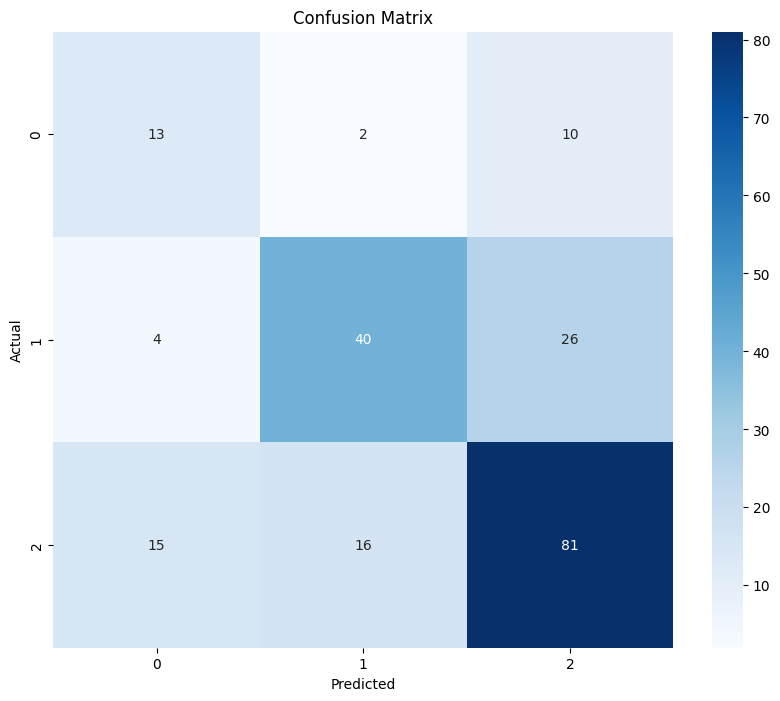

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [113]:
math_grid_params = {
    'classifier__n_estimators':[100, 200],
    'classifier__max_depth':[3, 5, 7],
    'classifier__learning_rate':[0.01, 0.05, 0.1]
}

math_grid = GridSearchCV(pipeline, param_grid=math_grid_params, scoring='accuracy', cv=5)
math_grid.fit(X_train, y_train)
best_math_model = math_grid.best_estimator_
print("Best Parameters:", math_grid.best_params_)
print("Best Score:", math_grid.best_score_)

Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best Score: 0.6711529933481153


In [114]:
joblib.dump(best_math_model, 'sat_math_prediction_model.pkl')

['sat_math_prediction_model.pkl']